In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime, timedelta
from networkx.algorithms.community import greedy_modularity_communities
import time
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', sep=',(?=\S)', engine='python')


df['friends'] = [json.loads(x) for x in df['friends']]
df['id'] = [int(str(x).replace('"', '')) for x in df['id']]
df['screenName'] = [x.replace('"', '') for x in df['screenName']]
data = df[df['friendsCount'] < 300]

In [ ]:
data.head()

,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
0,1969527638,LlngoMakeEmCum_,"[ ""#nationaldogday"" ]","""http://pbs.twimg.com/profile_images/534286217...",319,112,"""en""",1472271687519,"""769310701580083200""","[1969574754, 1969295556, 1969284056, 196961221..."
1,51878493,_notmichelle,"[ ""#nationaldogday"" ]","""http://pbs.twimg.com/profile_images/761977602...",275,115,"""en""",1472270622663,"""769309490038439936""","[60789485, 2420931980, 2899776756, 127410795, ..."
2,1393409100,jesseayye,"[ ""#narcos"" ]","""http://pbs.twimg.com/profile_images/713282938...",120,107,"""en""",1472804144409,"""771622623583186944""","[86868062, 19697415, 2998836604, 456295047, 74..."
4,710130422907207680,sarahdorat_16,"[ ""#nationaldogday"" ]","""http://pbs.twimg.com/profile_images/767180520...",128,218,"""en""",1472271397356,"""769309769144283137""","[1571896093, 768938323612008448, 2548665930, 3..."
5,3649469655,wanderIustregui,"[ ""#veranomtv2016"" ]","""http://pbs.twimg.com/profile_images/762400806...",479,131,"""en""",1472736978337,"""771340902308671488""","[2401096388, 707864762, 4096348512, 7638558599..."


# Dynamic Networks and their Characteristics:

In [ ]:
# 'friends' to list
def safe_eval(x):
    if isinstance(x, str):
        return eval(x)
    return x
data['friends'] = data['friends'].apply(safe_eval)
G = nx.Graph()
for _, row in data.iterrows():
    user_id = row['id']
    if isinstance(row['friends'], list):
        for friend in row['friends']:
            G.add_edge(user_id, friend)

<ipython-input-27-84aead2b575b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['friends'] = data['friends'].apply(safe_eval)


In [ ]:
data['friends'].head()

,friends
0,"[1969574754, 1969295556, 1969284056, 196961221..."
1,"[60789485, 2420931980, 2899776756, 127410795, ..."
2,"[86868062, 19697415, 2998836604, 456295047, 74..."
4,"[1571896093, 768938323612008448, 2548665930, 3..."
5,"[2401096388, 707864762, 4096348512, 7638558599..."


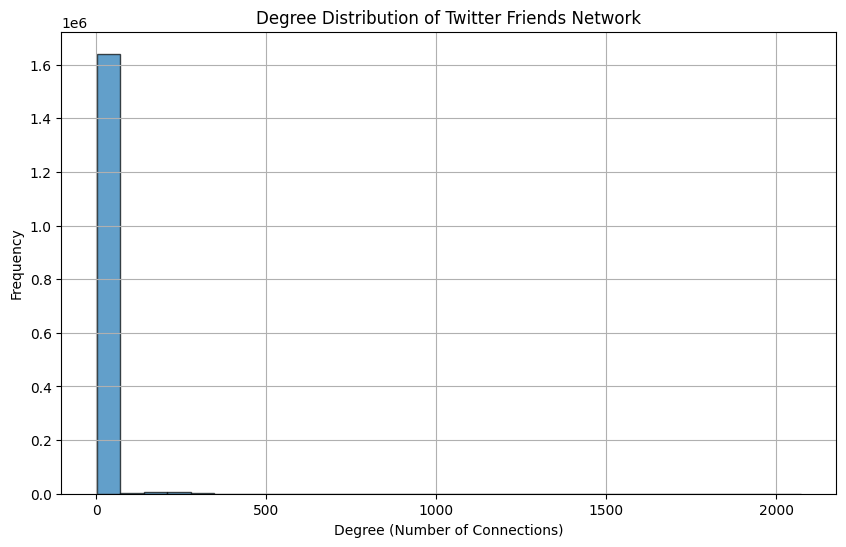

   Number of Nodes  Number of Edges  Average Degree  Network Density  \
0          1655530          2670645        3.226332         0.000002   

   Average Clustering Coefficient  
0                             0.0  


In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
density = nx.density(G)
clustering_coeff = nx.average_clustering(G)

degree_counts = [degree for _, degree in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degree_counts, bins=30, edgecolor='black', alpha=0.7)
plt.title('Degree Distribution of Twitter Friends Network')
plt.xlabel('Degree (Number of Connections)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

if num_nodes <= 100:
    plt.figure(figsize=(12, 8))
    nx.draw(G, with_labels=False, node_size=20, alpha=0.7)
    plt.title("Twitter Friends Network Visualization")
    plt.show()

network_summary = pd.DataFrame([{
    "Number of Nodes": num_nodes,
    "Number of Edges": num_edges,
    "Average Degree": avg_degree,
    "Network Density": density,
    "Average Clustering Coefficient": clustering_coeff
}])

print(network_summary)

# Representations of Dynamic Networks:

In [ ]:
# 'friends' to list
def safe_eval(x):
    if isinstance(x, str):
        return eval(x)
    return x
data['friends'] = data['friends'].apply(safe_eval)
data['lastSeen'] = pd.to_datetime(data['lastSeen'], unit='ms')
G = nx.Graph()
for _, row in data.iterrows():
    user_id = row['id']
    if isinstance(row['friends'], list):
        for friend in row['friends']:
            G_stream.add_edge(user_id, str(friend), time=row['lastSeen'])

<ipython-input-30-71e7ae6da937>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['friends'] = data['friends'].apply(safe_eval)
<ipython-input-30-71e7ae6da937>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lastSeen'] = pd.to_datetime(data['lastSeen'], unit='ms')


In [ ]:
import random
if len(G_stream) <= 100:
    plt.figure(figsize=(12, 8))
    pos = nx.random_layout(G_stream)
    nx.draw(G_stream, pos, with_labels=False, node_size=20, alpha=0.7, edge_color="blue")
    plt.title("Stream Graph Visualization")
    plt.show()

link_stream = {}
for u, v, d in G_stream.edges(data=True):
    link_stream.setdefault(d['time'], []).append((u, v))

start_time = data['lastSeen'].min()
end_time = data['lastSeen'].max()
time_interval = (end_time - start_time) / 5

edge_times = {(u, v): d['time'] for u, v, d in G_stream.edges(data=True)}
snapshots = []
current_time = start_time
while current_time < end_time:
    next_time = current_time + time_interval
    subgraph = nx.Graph([(u, v) for (u, v), time in edge_times.items() if current_time <= time < next_time])
    snapshots.append(subgraph)
    current_time = next_time

if snapshots:
    if len(snapshots[0]) > 500:
      print("Snapshot still large, but attempting visualization.")
    else:
        plt.figure(figsize=(12, 8))
        sampled_nodes = random.sample(G_stream.nodes(), k=min(100, len(G_stream)))
        subgraph = G_stream.subgraph(sampled_nodes)
        nx.draw(subgraph, with_labels=False, node_size=7, alpha=0.7, edge_color="green", width=0.5)
        plt.title("Snapshot Visualization (Interval 1)")
        plt.show()

stream_density = nx.density(G_stream)
avg_clustering = nx.average_clustering(G_stream)
avg_degree = sum(dict(G_stream.degree()).values()) / G_stream.number_of_nodes()

dynamic_network_metrics = pd.DataFrame([{
    "Start Time": start_time,
    "End Time": end_time,
    "Stream Graph Density": stream_density,
    "Average Clustering Coefficient": avg_clustering,
    "Average Degree": avg_degree,
    "Number of Snapshots": len(snapshots)
}])

print(dynamic_network_metrics)


Snapshot still large, but attempting visualization.
               Start Time                End Time  Stream Graph Density  \
0 2016-08-26 22:00:08.554 2016-09-02 09:13:18.334              0.000002   

   Average Clustering Coefficient  Average Degree  Number of Snapshots  
0                             0.0        3.226332                    5  


<ipython-input-32-ddafa8c1aba5>:27: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(snapshots[0].nodes(), k=min(1000, len(snapshots[0].nodes())))


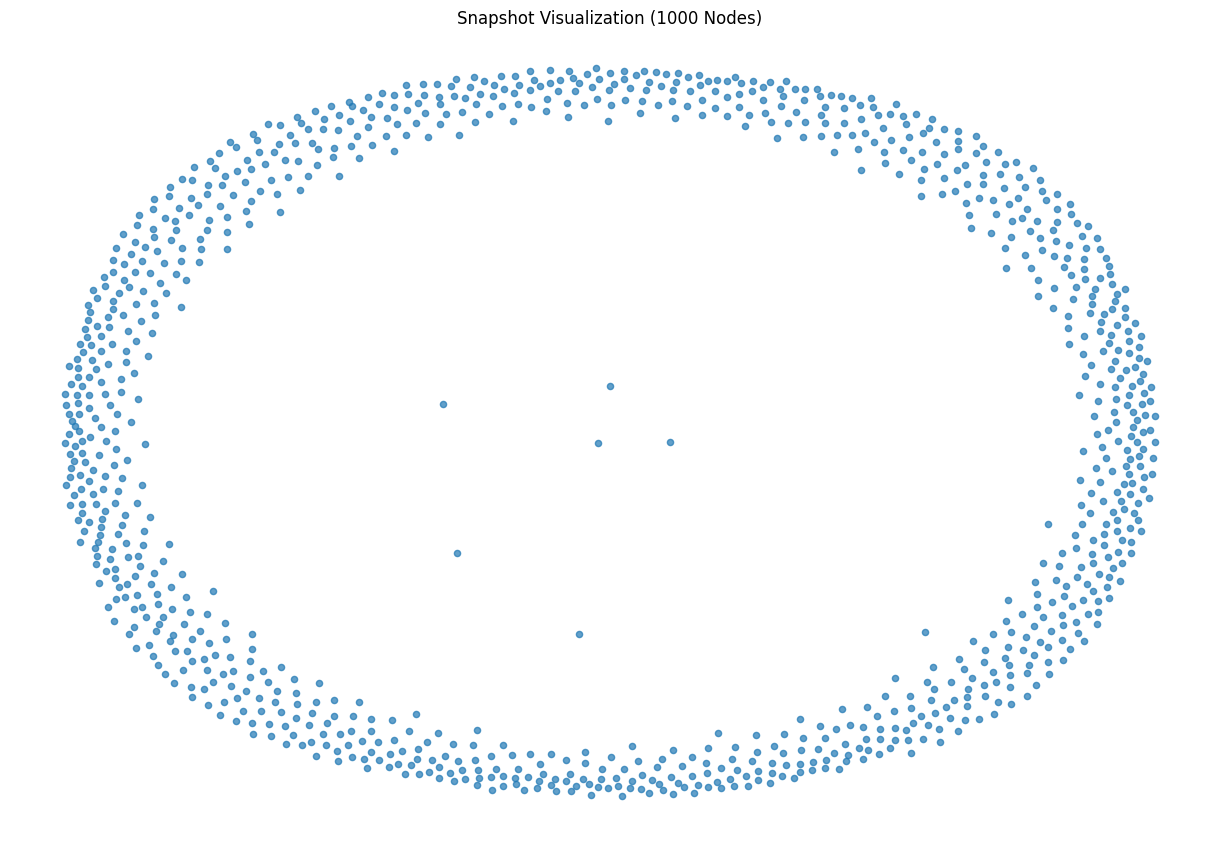

               Start Time                End Time  Stream Graph Density  \
0 2016-08-26 22:00:08.554 2016-09-02 09:13:18.334              0.000002   

   Average Clustering Coefficient  Average Degree  Number of Snapshots  
0                             0.0        3.226332                    5  


In [ ]:
import random
if len(G_stream) <= 100:
    plt.figure(figsize=(12, 8))
    pos = nx.random_layout(G_stream)
    nx.draw(G_stream, pos, with_labels=False, node_size=20, alpha=0.7, edge_color="blue")
    plt.title("Stream Graph Visualization")
    plt.show()

link_stream = {}
for u, v, d in G_stream.edges(data=True):
    link_stream.setdefault(d['time'], []).append((u, v))

start_time = data['lastSeen'].min()
end_time = data['lastSeen'].max()
time_interval = (end_time - start_time) / 5

edge_times = {(u, v): d['time'] for u, v, d in G_stream.edges(data=True)}
snapshots = []
current_time = start_time
while current_time < end_time:
    next_time = current_time + time_interval
    subgraph = nx.Graph([(u, v) for (u, v), time in edge_times.items() if current_time <= time < next_time])
    snapshots.append(subgraph)
    current_time = next_time

if snapshots:
    sampled_nodes = random.sample(snapshots[0].nodes(), k=min(1000, len(snapshots[0].nodes())))
    subgraph = snapshots[0].subgraph(sampled_nodes)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=False, node_size=20, alpha=0.7, edge_color="green", width=0.5)
    plt.title("Snapshot Visualization (1000 Nodes)")
    plt.show()

stream_density = nx.density(G_stream)
avg_clustering = nx.average_clustering(G_stream)
avg_degree = sum(dict(G_stream.degree()).values()) / G_stream.number_of_nodes()

dynamic_network_metrics = pd.DataFrame([{
    "Start Time": start_time,
    "End Time": end_time,
    "Stream Graph Density": stream_density,
    "Average Clustering Coefficient": avg_clustering,
    "Average Degree": avg_degree,
    "Number of Snapshots": len(snapshots)
}])

print(dynamic_network_metrics)


# Analyzing Network Evolution:

In [ ]:
# 'friends' to list
def safe_eval(x):
    if isinstance(x, str):
        return eval(x)
    return x
data['friends'] = data['friends'].apply(safe_eval)
data['lastSeen'] = pd.to_datetime(data['lastSeen'], unit='ms')
G = nx.Graph()
for _, row in data.iterrows():
    user_id = row['id']
    if isinstance(row['friends'], list):
        for friend in row['friends']:
            G_stream.add_edge(user_id, str(friend), time=row['lastSeen'])

start_time = data['lastSeen'].min()
end_time = data['lastSeen'].max()

<ipython-input-33-e057e5eb3bfd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['friends'] = data['friends'].apply(safe_eval)
<ipython-input-33-e057e5eb3bfd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lastSeen'] = pd.to_datetime(data['lastSeen'], unit='ms')


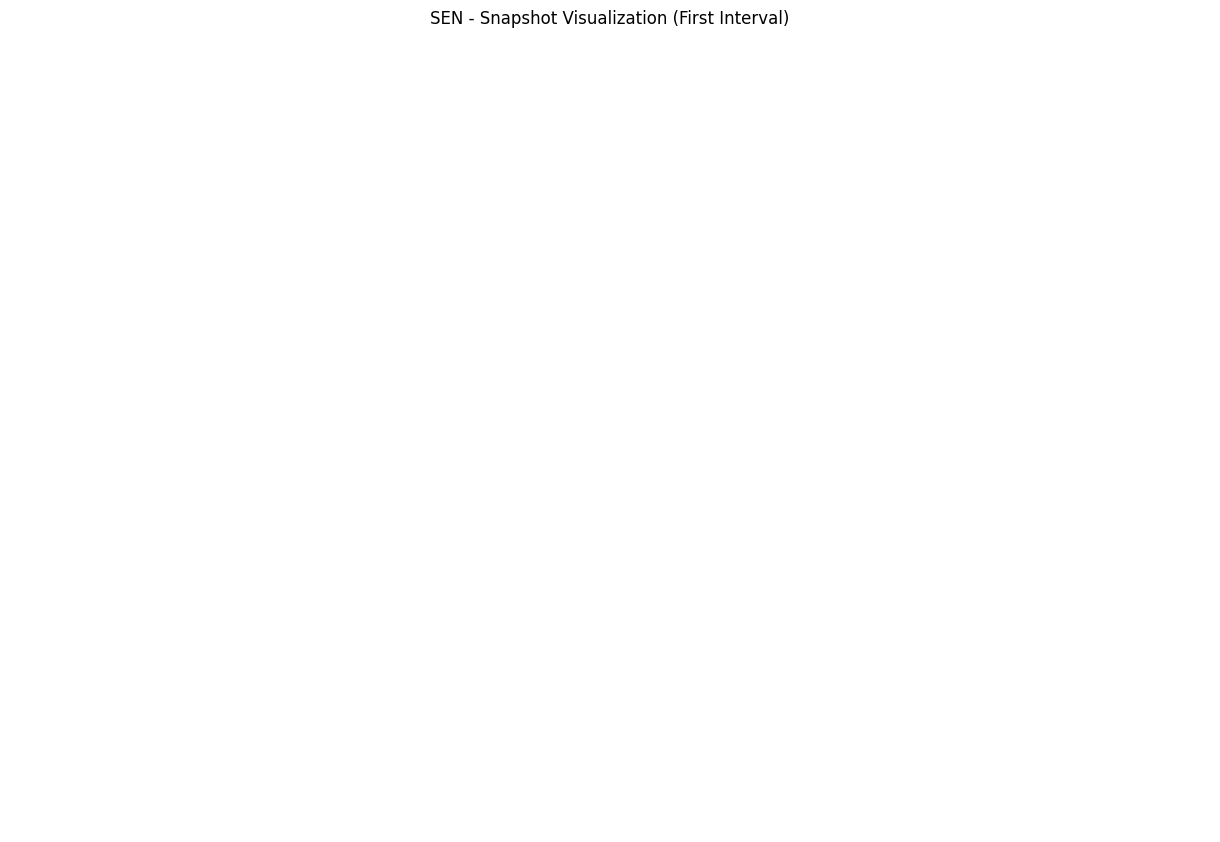

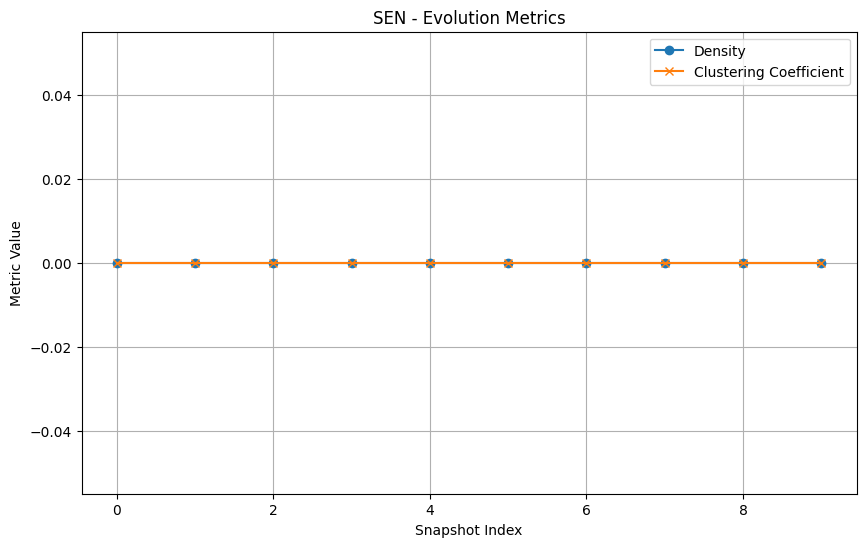

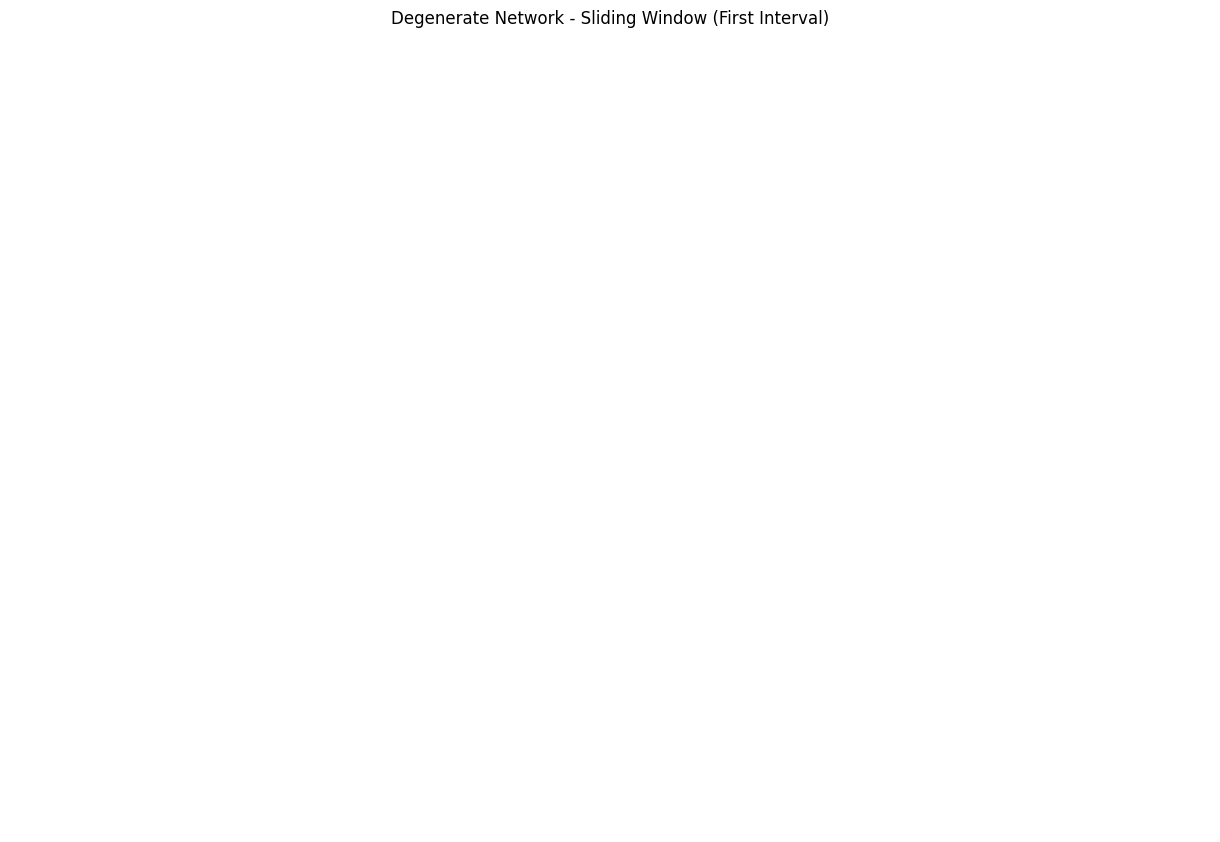

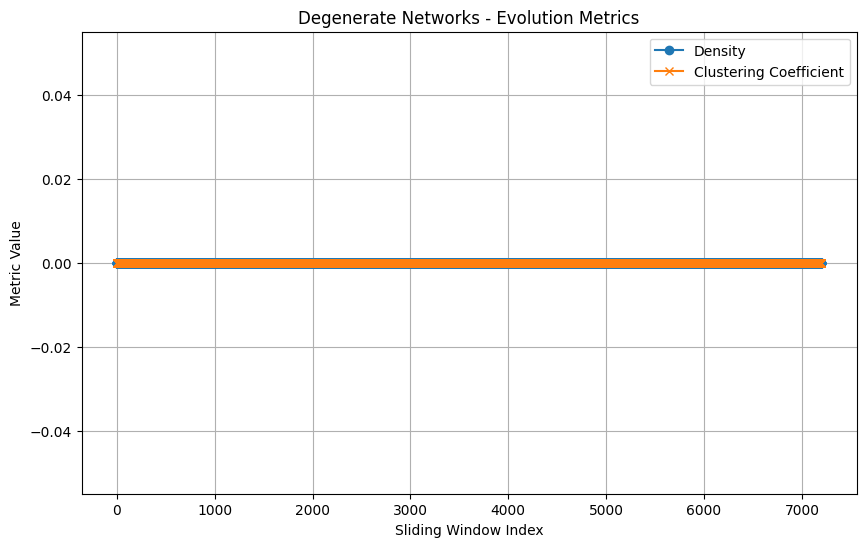

       Method  Average Density  Average Clustering Coefficient  \
0         SEN              0.0                             0.0   
1  Degenerate              0.0                             0.0   

   Number of Snapshots/Windows  Total Computation Time (s)  
0                           10                    0.011073  
1                         7199                    8.166364  


In [ ]:
def analyze_sen_optimized(data, start_time, end_time, time_interval, visualize=True, max_nodes=1000):
    snapshots = []
    densities = []
    clustering_coeffs = []
    times = []

    current_time = start_time

    while current_time < end_time:
        start = time.time()
        next_time = current_time + time_interval
        snapshot_graph = nx.Graph()

        interval_data = data[(data['lastSeen'] >= current_time) & (data['lastSeen'] < next_time)]

        for _, row in interval_data.iterrows():
            if isinstance(row['friends'], list):
                for friend in row['friends']:
                    snapshot_graph.add_edge(row['id'], friend)

        snapshots.append(snapshot_graph)
        densities.append(nx.density(snapshot_graph))
        clustering_coeffs.append(nx.average_clustering(snapshot_graph) if snapshot_graph.number_of_nodes() > 0 else 0)

        current_time = next_time
        times.append(time.time() - start)

    if visualize:
        sampled_nodes = random.sample(list(snapshots[0].nodes()), k=min(max_nodes, len(snapshots[0].nodes())))
        sampled_graph = snapshots[0].subgraph(sampled_nodes)

        plt.figure(figsize=(12, 8))
        nx.draw(sampled_graph, node_size=20, alpha=0.7, edge_color="blue")
        plt.title("SEN - Snapshot Visualization (First Interval)")
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(densities, label="Density", marker='o')
        plt.plot(clustering_coeffs, label="Clustering Coefficient", marker='x')
        plt.title("SEN - Evolution Metrics")
        plt.xlabel("Snapshot Index")
        plt.ylabel("Metric Value")
        plt.legend()
        plt.grid(True)
        plt.show()

    return snapshots, densities, clustering_coeffs, sum(times)


def analyze_degenerate_optimized(data, start_time, end_time, window_size, visualize=True, max_nodes=1000):
    sliding_windows = []
    densities = []
    clustering_coeffs = []
    times = []

    current_time = start_time

    while current_time + window_size <= end_time:
        start = time.time()
        window_graph = nx.Graph()

        window_data = data[(data['lastSeen'] >= current_time) & (data['lastSeen'] < current_time + window_size)]

        for _, row in window_data.iterrows():
            if isinstance(row['friends'], list):
                for friend in row['friends']:
                    window_graph.add_edge(row['id'], friend)

        sliding_windows.append(window_graph)
        densities.append(nx.density(window_graph))
        clustering_coeffs.append(nx.average_clustering(window_graph) if window_graph.number_of_nodes() > 0 else 0)

        current_time += timedelta(milliseconds=500)
        times.append(time.time() - start)

    if visualize:
        sampled_nodes = random.sample(list(sliding_windows[0].nodes()), k=min(max_nodes, len(sliding_windows[0].nodes())))
        sampled_graph = sliding_windows[0].subgraph(sampled_nodes)

        plt.figure(figsize=(12, 8))
        nx.draw(sampled_graph, node_size=20, alpha=0.7, edge_color="green")
        plt.title("Degenerate Network - Sliding Window (First Interval)")
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(densities, label="Density", marker='o')
        plt.plot(clustering_coeffs, label="Clustering Coefficient", marker='x')
        plt.title("Degenerate Networks - Evolution Metrics")
        plt.xlabel("Sliding Window Index")
        plt.ylabel("Metric Value")
        plt.legend()
        plt.grid(True)
        plt.show()

    return sliding_windows, densities, clustering_coeffs, sum(times)

start_time = datetime(2023, 1, 1, 0, 0, 0)
end_time = datetime(2023, 1, 1, 1, 0, 0)

data.loc[:, 'lastSeen'] = pd.to_datetime(data['lastSeen'])

time_interval = (end_time - start_time) / 10
window_size = timedelta(milliseconds=1000)

sen_snapshots, sen_densities, sen_clustering, sen_time = analyze_sen_optimized(
    data, start_time, end_time, time_interval, visualize=True, max_nodes=1000)

deg_windows, deg_densities, deg_clustering, deg_time = analyze_degenerate_optimized(
    data, start_time, end_time, window_size, visualize=True, max_nodes=1000)

metrics_summary = pd.DataFrame({
    "Method": ["SEN", "Degenerate"],
    "Average Density": [sum(sen_densities) / len(sen_densities), sum(deg_densities) / len(deg_densities)],
    "Average Clustering Coefficient": [sum(sen_clustering) / len(sen_clustering), sum(deg_clustering) / len(deg_clustering)],
    "Number of Snapshots/Windows": [len(sen_snapshots), len(deg_windows)],
    "Total Computation Time (s)": [sen_time, deg_time]
})

print(metrics_summary)


# Stream Graph Metrics and Properties:

In [ ]:
def safe_eval(x):
    if isinstance(x, str):
        return eval(x)
    return x
data['friends'] = data['friends'].apply(safe_eval)
data['lastSeen'] = pd.to_datetime(data['lastSeen'], unit='ms')
G = nx.Graph()
for _, row in data.iterrows():
    user_id = row['id']
    if isinstance(row['friends'], list):
        for friend in row['friends']:
            G_stream.add_edge(user_id, str(friend), time=row['lastSeen'])

<ipython-input-35-953df1f85acb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['friends'] = data['friends'].apply(safe_eval)
<ipython-input-35-953df1f85acb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lastSeen'] = pd.to_datetime(data['lastSeen'], unit='ms')


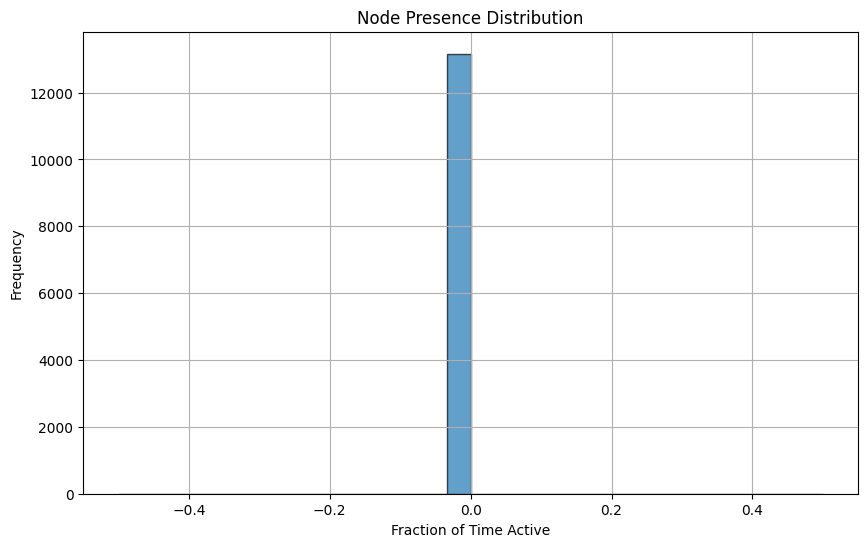

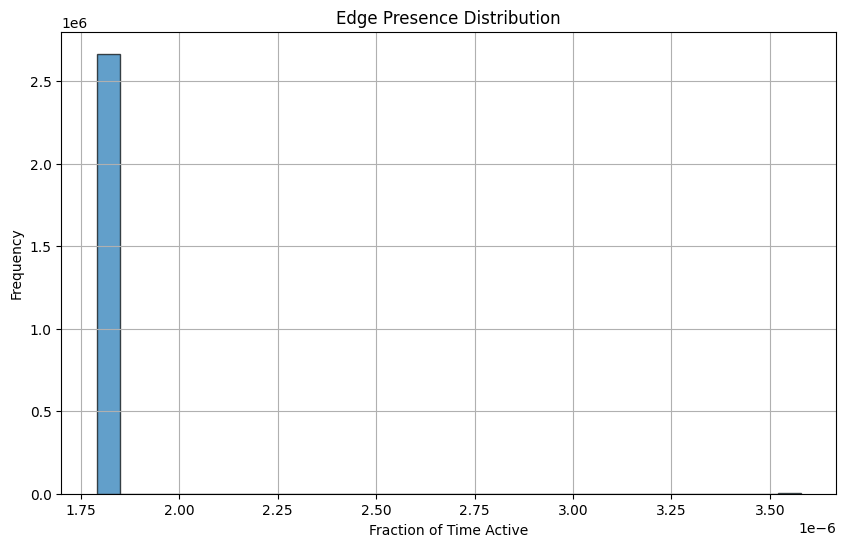

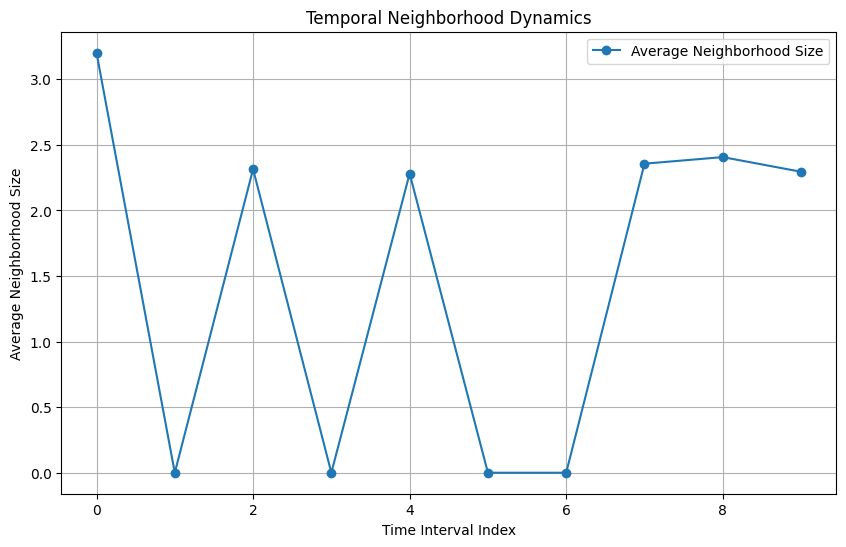

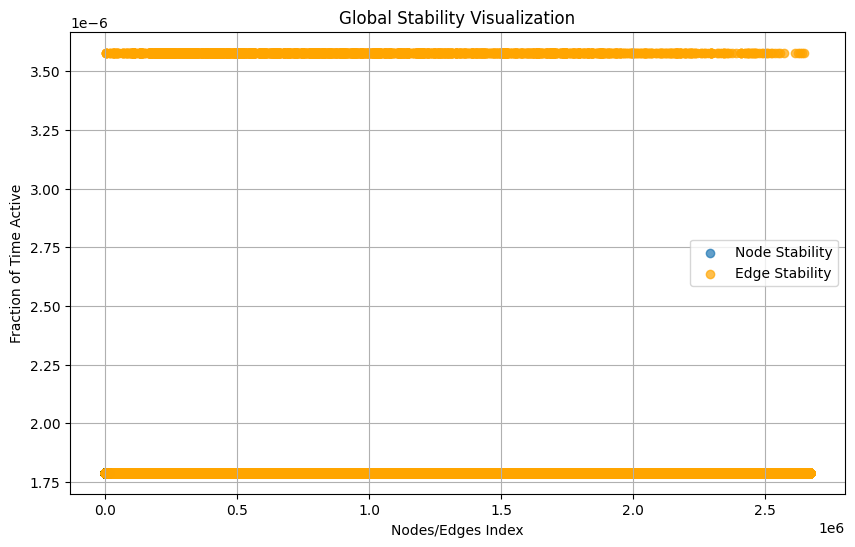

                      Metric     Value
0      Average Node Presence  0.000002
1      Average Edge Presence  0.000002
2  Average Neighborhood Size  1.485486


In [ ]:
def compute_node_edge_metrics_fixed(data, start_time, end_time):
    node_presence = {}
    edge_presence = {}

    for _, row in data.iterrows():
        user_id = str(row['id'])
        timestamp = row['lastSeen']
        if user_id not in node_presence:
            node_presence[user_id] = []
        node_presence[user_id].append(timestamp)

        if isinstance(row['friends'], list):
            for friend in row['friends']:
                edge = tuple(sorted([str(user_id), str(friend)]))
                if edge not in edge_presence:
                    edge_presence[edge] = []
                edge_presence[edge].append(timestamp)

    node_metrics = {node: len(times) / (end_time - start_time).total_seconds() for node, times in node_presence.items()}
    edge_metrics = {edge: len(times) / (end_time - start_time).total_seconds() for edge, times in edge_presence.items()}

    plt.figure(figsize=(10, 6))
    plt.hist(node_metrics.values(), bins=30, edgecolor='black', alpha=0.7)
    plt.title("Node Presence Distribution")
    plt.xlabel("Fraction of Time Active")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(edge_metrics.values(), bins=30, edgecolor='black', alpha=0.7)
    plt.title("Edge Presence Distribution")
    plt.xlabel("Fraction of Time Active")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    return node_metrics, edge_metrics

def compute_temporal_neighborhood(data, start_time, end_time, time_interval):
    neighborhood_sizes = []
    current_time = start_time

    while current_time < end_time:
        next_time = current_time + time_interval
        temp_graph = nx.Graph()

        for _, row in data.iterrows():
            if current_time <= row['lastSeen'] < next_time and isinstance(row['friends'], list):
                for friend in row['friends']:
                    temp_graph.add_edge(str(row['id']), str(friend))

        avg_neighborhood_size = sum(len(list(temp_graph.neighbors(node))) for node in temp_graph.nodes) / temp_graph.number_of_nodes() if temp_graph.number_of_nodes() > 0 else 0
        neighborhood_sizes.append(avg_neighborhood_size)
        current_time = next_time

    plt.figure(figsize=(10, 6))
    plt.plot(neighborhood_sizes, label="Average Neighborhood Size", marker='o')
    plt.title("Temporal Neighborhood Dynamics")
    plt.xlabel("Time Interval Index")
    plt.ylabel("Average Neighborhood Size")
    plt.grid(True)
    plt.legend()
    plt.show()

    return neighborhood_sizes

def visualize_global_properties(node_metrics, edge_metrics):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(node_metrics)), list(node_metrics.values()), alpha=0.7, label="Node Stability")
    plt.scatter(range(len(edge_metrics)), list(edge_metrics.values()), alpha=0.7, color='orange', label="Edge Stability")
    plt.title("Global Stability Visualization")
    plt.xlabel("Nodes/Edges Index")
    plt.ylabel("Fraction of Time Active")
    plt.legend()
    plt.grid(True)
    plt.show()

node_metrics_fixed, edge_metrics_fixed = compute_node_edge_metrics_fixed(data, data['lastSeen'].min(), data['lastSeen'].max())
time_interval = (data['lastSeen'].max() - data['lastSeen'].min()) / 10
neighborhood_sizes_fixed = compute_temporal_neighborhood(data, data['lastSeen'].min(), data['lastSeen'].max(), time_interval)
visualize_global_properties(node_metrics_fixed, edge_metrics_fixed)

summary_fixed = pd.DataFrame({
    "Metric": ["Average Node Presence", "Average Edge Presence", "Average Neighborhood Size"],
    "Value": [
        sum(node_metrics_fixed.values()) / len(node_metrics_fixed),
        sum(edge_metrics_fixed.values()) / len(edge_metrics_fixed),
        sum(neighborhood_sizes_fixed) / len(neighborhood_sizes_fixed)
    ]
})

print(summary_fixed)


# Applications:

In [ ]:
def safe_eval(x):
    if isinstance(x, str):
        return eval(x)
    return x
data['friends'] = data['friends'].apply(safe_eval)
G = nx.Graph()
for _, row in data.iterrows():
    user_id = row['id']
    if isinstance(row['friends'], list):
        for friend in row['friends']:
            G.add_edge(user_id, friend)

<ipython-input-37-60577d785960>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['friends'] = data['friends'].apply(safe_eval)


In [ ]:
data['friends'].head()

,friends
0,"[1969574754, 1969295556, 1969284056, 196961221..."
1,"[60789485, 2420931980, 2899776756, 127410795, ..."
2,"[86868062, 19697415, 2998836604, 456295047, 74..."
4,"[1571896093, 768938323612008448, 2548665930, 3..."
5,"[2401096388, 707864762, 4096348512, 7638558599..."


In [ ]:
print(data[['id', 'friends']].head())

                   id                                            friends
0          1969527638  [1969574754, 1969295556, 1969284056, 196961221...
1            51878493  [60789485, 2420931980, 2899776756, 127410795, ...
2          1393409100  [86868062, 19697415, 2998836604, 456295047, 74...
4  710130422907207680  [1571896093, 768938323612008448, 2548665930, 3...
5          3649469655  [2401096388, 707864762, 4096348512, 7638558599...


In [ ]:
edges = [(str(row['id']), str(friend)) for _, row in data.iterrows() for friend in row['friends']]

In [ ]:
print(f"Nombre total d'arêtes générées : {len(edges)}")

Nombre total d'arêtes générées : 2670645


In [ ]:
sample_edges = edges[:50]
print("Échantillon de 50 arêtes :")
print(sample_edges)

Échantillon de 50 arêtes :
[('1969527638', '1969574754'), ('1969527638', '1969295556'), ('1969527638', '1969284056'), ('1969527638', '1969612214'), ('1969527638', '1970067476'), ('1969527638', '1969797386'), ('1969527638', '1969430539'), ('1969527638', '1969840064'), ('1969527638', '1969698176'), ('1969527638', '1970005154'), ('1969527638', '283011644'), ('1969527638', '1969901029'), ('1969527638', '1969563175'), ('1969527638', '1969302314'), ('1969527638', '1969978662'), ('1969527638', '1969457936'), ('1969527638', '1969667533'), ('1969527638', '1969547821'), ('1969527638', '1969943478'), ('1969527638', '1969668032'), ('1969527638', '283006529'), ('1969527638', '1969809440'), ('1969527638', '1969601096'), ('1969527638', '1969298856'), ('1969527638', '1969331652'), ('1969527638', '1969385498'), ('1969527638', '1969674368'), ('1969527638', '1969565263'), ('1969527638', '1970144676'), ('1969527638', '1969745390'), ('1969527638', '1969947438'), ('1969527638', '1969734134'), ('1969527638',

In [ ]:
G = nx.Graph()
G.add_edges_from(sample_edges)

In [ ]:
print(f"Nombre de nœuds : {len(G.nodes)}, Nombre d'arêtes : {len(G.edges)}")

Nombre de nœuds : 51, Nombre d'arêtes : 50


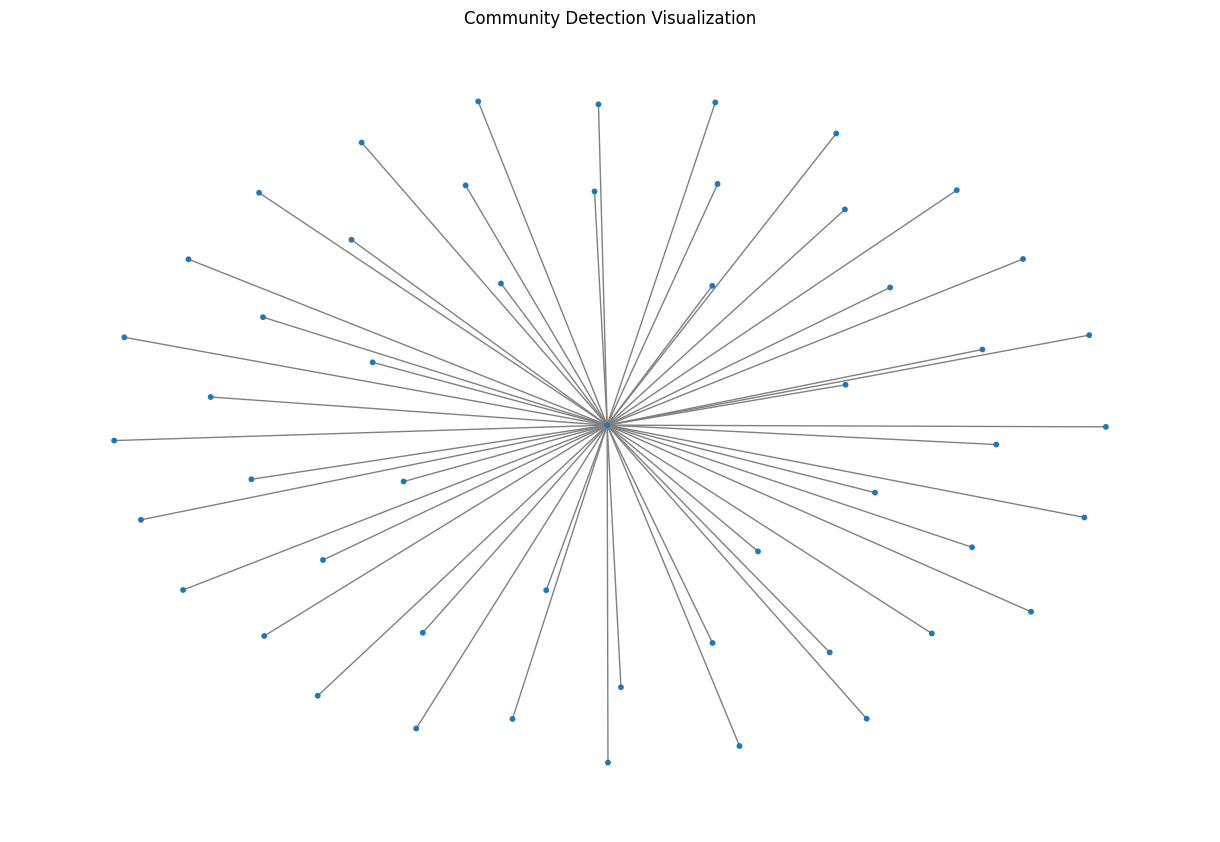

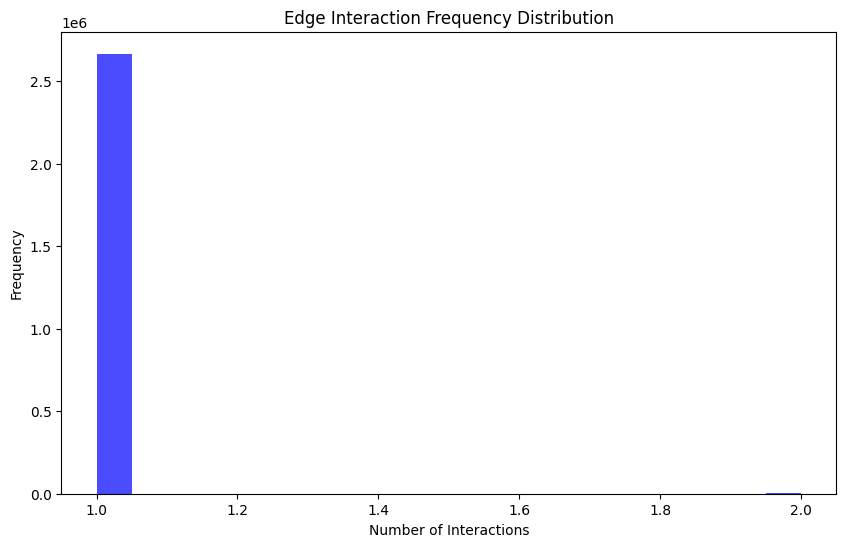

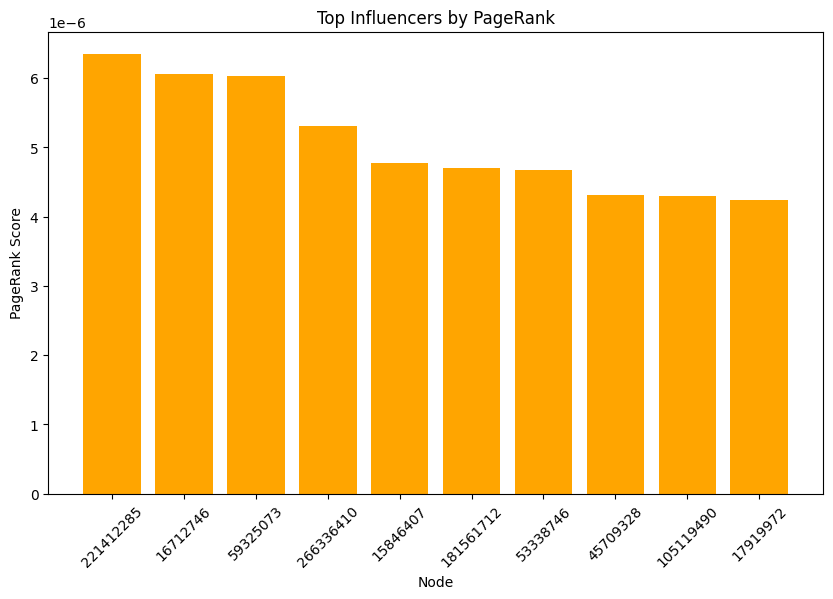

{'Average Modularity': 0.0, 'Edge Density': 2094.6235294117646, 'Top PageRank': 6.353976227528178e-06, 'Community Detection Time (s)': 0.7691376209259033, 'Interaction Patterns Time (s)': 10.554821729660034, 'Information Flow Time (s)': 35.20010304450989}


In [ ]:
# Step 1: Community Detection
def detect_communities(graph):
    if len(graph.nodes) == 0 or len(graph.edges) == 0:
        print("Graph is empty, skipping community detection.")
        return [], 0.0, 0.0

    start_time = time.time()
    try:
        communities = list(nx.algorithms.community.greedy_modularity_communities(graph))
        modularity = nx.algorithms.community.modularity(graph, communities)
    except ZeroDivisionError:
        print("Division by zero encountered in modularity calculation.")
        communities = []
        modularity = 0.0

    if len(graph.nodes) > 0:
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(graph, seed=42)
        node_community_map = {node: i for i, com in enumerate(communities) for node in com}
        node_colors = [f"C{node_community_map[node]}" for node in graph.nodes]
        nx.draw(graph, pos, node_color=node_colors, with_labels=False, node_size=10, edge_color="gray")
        plt.title("Community Detection Visualization")
        plt.show()

    elapsed_time = time.time() - start_time
    return communities, modularity, elapsed_time


# Interaction Patterns Analysis
def analyze_interaction_patterns(graph_edges, graph):
    start_time = time.time()
    edge_counts = Counter(tuple(sorted(edge)) for edge in graph_edges)
    edge_freqs = list(edge_counts.values())

    plt.figure(figsize=(10, 6))
    plt.hist(edge_freqs, bins=20, color="blue", alpha=0.7)
    plt.title("Edge Interaction Frequency Distribution")
    plt.xlabel("Number of Interactions")
    plt.ylabel("Frequency")
    plt.show()

    edge_density = len(graph_edges) / (len(graph.nodes) * (len(graph.nodes) - 1) / 2)
    elapsed_time = time.time() - start_time
    return edge_counts, edge_density, elapsed_time

# Information Flow Analysis
def analyze_information_flow(data):
    start_time = time.time()
    directed_edges = [(row['id'], friend) for _, row in data.iterrows() for friend in row['friends']]
    digraph = nx.DiGraph()
    digraph.add_edges_from(directed_edges)


    pagerank = nx.pagerank(digraph)

    top_influencers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
    plt.figure(figsize=(10, 6))
    plt.bar([str(node) for node, _ in top_influencers], [score for _, score in top_influencers], color="orange")
    plt.title("Top Influencers by PageRank")
    plt.xlabel("Node")
    plt.ylabel("PageRank Score")
    plt.xticks(rotation=45)
    plt.show()

    elapsed_time = time.time() - start_time
    return pagerank, elapsed_time

# Summary Metrics and Performance Tracking
def summary_metrics(modularity, edge_density, pagerank, elapsed_times):
    avg_modularity = modularity
    top_pagerank = max(pagerank.values())

    summary = {
        "Average Modularity": avg_modularity,
        "Edge Density": edge_density,
        "Top PageRank": top_pagerank,
        "Community Detection Time (s)": elapsed_times[0],
        "Interaction Patterns Time (s)": elapsed_times[1],
        "Information Flow Time (s)": elapsed_times[2],
    }
    return summary

communities, modularity, time_communities = detect_communities(G)
edge_counts, edge_density, time_interactions = analyze_interaction_patterns(edges, G)
pagerank, time_info_flow = analyze_information_flow(data)
elapsed_times = [time_communities, time_interactions, time_info_flow]
summary = summary_metrics(modularity, edge_density, pagerank, elapsed_times)

print(summary)


In [ ]:
# Détection de communautés (Greedy modularity-based)
start_time = time.time()
communities = list(greedy_modularity_communities(G))

In [ ]:
communities

[frozenset({'1969259820',
            '1969284056',
            '1969295556',
            '1969298856',
            '1969302314',
            '1969302888',
            '1969324008',
            '1969331652',
            '1969385498',
            '1969430539',
            '1969437804',
            '1969457936',
            '1969501046',
            '1969507394',
            '1969509972',
            '1969527638',
            '1969535827',
            '1969547821',
            '1969563175',
            '1969565263',
            '1969574754',
            '1969601096',
            '1969603532',
            '1969612214',
            '1969667533',
            '1969668032',
            '1969674368',
            '1969698176',
            '1969734134',
            '1969745390',
            '1969751588',
            '1969771688',
            '1969797386',
            '1969801326',
            '1969809440',
            '1969840064',
            '1969887518',
            '1969901029',
            

In [ ]:
print(f"Nombre de nœuds : {len(G.nodes)}, Nombre d'arêtes : {len(G.edges)}")

Nombre de nœuds : 51, Nombre d'arêtes : 50


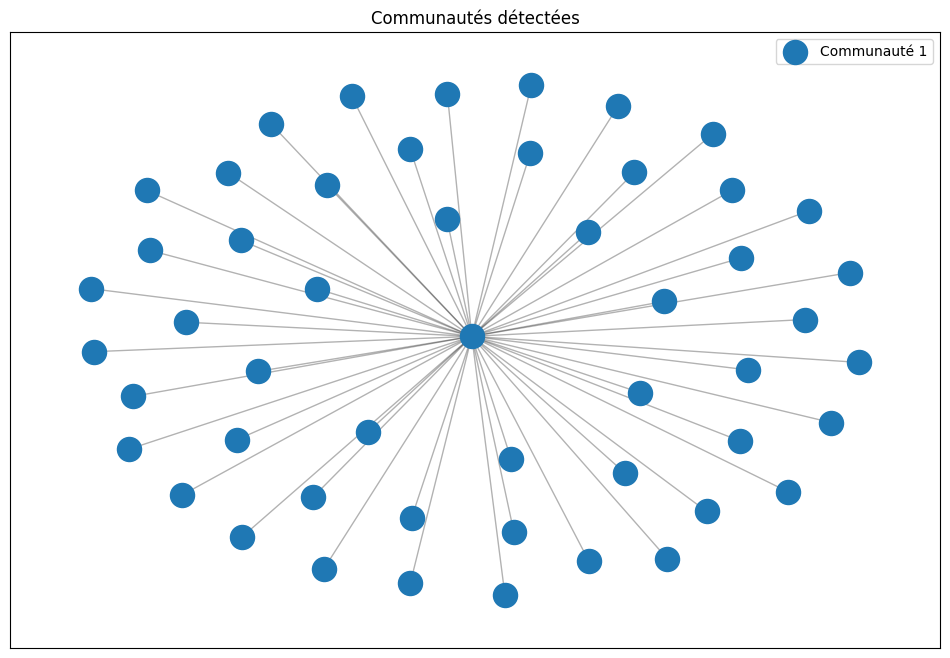

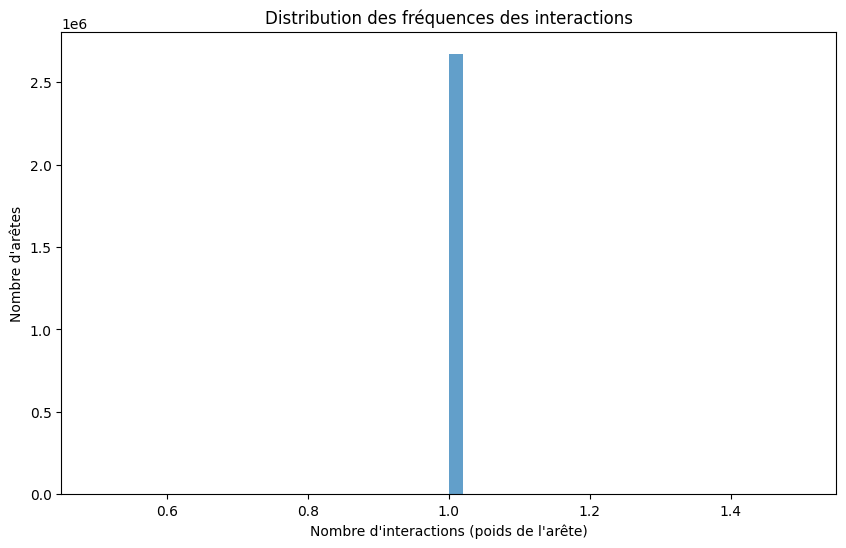

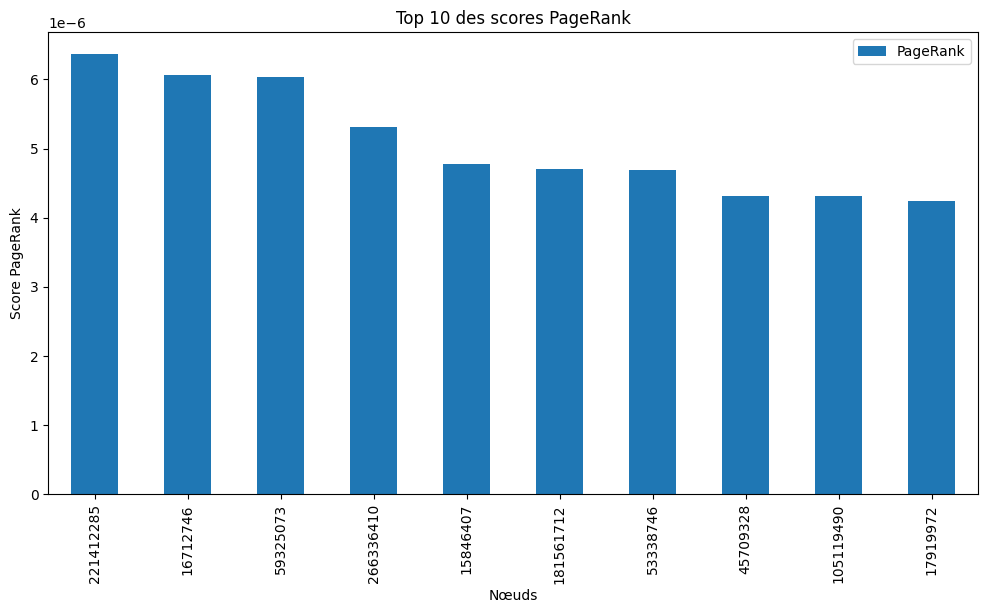

{'Nombre total de nœuds': 51, "Nombre total d'arêtes": 50, 'Modularité moyenne': 0.0, 'Densité des arêtes': 0.0392156862745098, 'Top PageRank Score': 6.365503816051278e-06, 'Temps pour la détection de communautés': 0.11934161186218262, "Temps pour l'analyse des interactions": 1.2047104835510254, "Temps pour l'analyse des flux": 30.15092635154724}


In [ ]:

modularity_score = nx.algorithms.community.modularity(G, communities)
community_time = time.time() - start_time

# Analyse des interactions
start_time = time.time()
edge_weights = Counter(edges)
edge_density = nx.density(G)
interaction_time = time.time() - start_time

# Analyse des flux d'information
start_time = time.time()
directed_G = nx.DiGraph()
directed_G.add_edges_from(edges)

pagerank_scores = nx.pagerank(directed_G)

# Top 10 des scores PageRank
top_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
flow_analysis_time = time.time() - start_time

summary = {
    "Nombre total de nœuds": len(G.nodes),
    "Nombre total d'arêtes": len(G.edges),
    "Modularité moyenne": modularity_score,
    "Densité des arêtes": edge_density,
    "Top PageRank Score": top_pagerank[0][1] if top_pagerank else None,
    "Temps pour la détection de communautés": community_time,
    "Temps pour l'analyse des interactions": interaction_time,
    "Temps pour l'analyse des flux": flow_analysis_time,
}

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), label=f"Communauté {i+1}")
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Communautés détectées")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(edge_weights.values(), bins=50, alpha=0.7)
plt.title("Distribution des fréquences des interactions")
plt.xlabel("Nombre d'interactions (poids de l'arête)")
plt.ylabel("Nombre d'arêtes")
plt.show()

pagerank_df = pd.DataFrame(top_pagerank, columns=['Node', 'PageRank']).set_index('Node')
pagerank_df.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 des scores PageRank")
plt.xlabel("Nœuds")
plt.ylabel("Score PageRank")
plt.show()

print(summary)